# 1. Primerjava cen električne energije

**Pri tem vprašanju nas zanima primerjava cen električne energije med gospodinjskimi in negospodinjskimi odjemalci ter med različnimi standardnimi porabniškimi skupinami.**

#### 1.1 Pregled podatkov v potrebnih podatkovnih setih

Najprej smo pregledali podatke v podatkovnih setih, ki smo jih uporabljali. To smo naredili z izpisom opisa podatkovnega okvirja in nekaj osnovnimi grafi.

In [54]:
from reading import data_extraction as de
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import misc_utils as mu

household_prices = de.read('../data/Cene el. energije za gospodinjske odjemalce.csv')
nonhousehold_prices = de.read('../data/Cene el. energije za negospodinjske odjemalce.csv')
hp = dict()
nhp = dict()

mu.display_side_by_side(household_prices.describe(), nonhousehold_prices.describe(), titles=['Gospodinjski odjemalci', 'Negospodinjski odjemalci'])

# Prepare dicts of household prices and non household prices. These dicts 
# are used to plot how the prices change over time.
# Key: user group, value: dict of key(quarter) and value(price)        
hp = mu.init_dict_based_on_column(household_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')
nhp = mu.init_dict_based_on_column(nonhousehold_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')
        
# Fill dicts with prices for each user group and quarter, thus symulating a matrix.
# Prices include all taxes.
for column in household_prices.columns[2:]:
    for key, value in hp.items():
        hp[key][column] = household_prices[column][household_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][household_prices['CENA'] == 'Z vsemi davki'].tolist()[0]
        
for column in nonhousehold_prices.columns[2:]:
    for key, value in nhp.items():
        nhp[key][column] = nonhousehold_prices[column][nonhousehold_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][nonhousehold_prices['CENA'] == 'Z vsemi davki'].tolist()[0]        

# Flatten the internal dicts for use in plotting.
hits = mu.flatten_internal_dict(hp)
nhits = mu.flatten_internal_dict(nhp)

# Get quarter names.
quarters = [x for x in [y for y in hp.values()][0].keys()]



,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,0.095812,0.098276,0.099336,0.096806,0.098494,0.102603,0.104812,0.101230,0.101430,0.101906,0.101118,0.095500,0.095173,0.096188,0.09917,0.095767,0.092858,0.095252,0.096670,0.092452,0.098836,0.103024,0.104197,0.096533,0.106712,0.109139,0.110624,0.103161,0.107197,0.109030,0.110852,0.103391,0.096779,0.085239,0.115494,0.103721,0.108367,0.113173,0.116652,0.104361
std,0.055142,0.056928,0.058002,0.055973,0.056383,0.059223,0.061186,0.058635,0.059471,0.059431,0.057843,0.053028,0.053847,0.054130,0.05631,0.053713,0.051471,0.052737,0.053545,0.051145,0.058913,0.062254,0.062802,0.055995,0.072688,0.071973,0.072089,0.063328,0.072242,0.071328,0.071203,0.062888,0.060164,0.049546,0.074416,0.062292,0.072887,0.074975,0.075431,0.062714
min,0.005200,0.005300,0.005400,0.005300,0.006700,0.007700,0.008100,0.007600,0.007600,0.008100,0.008500,0.008100,0.007200,0.008100,0.00890,0.008400,0.007900,0.009100,0.009600,0.008200,0.007800,0.009200,0.009200,0.008300,0.007600,0.009600,0.010000,0.008300,0.007800,0.009300,0.010000,0.008500,0.006500,0.005800,0.010200,0.008100,0.007500,0.009300,0.010700,0.008000
25%,0.057400,0.058900,0.060000,0.057300,0.056300,0.058500,0.059700,0.056800,0.056000,0.057100,0.057300,0.055900,0.056100,0.055800,0.05640,0.055600,0.054600,0.055000,0.055400,0.054000,0.053900,0.054500,0.055000,0.052400,0.054400,0.054400,0.055300,0.055500,0.056100,0.056700,0.057600,0.058500,0.055200,0.044800,0.063800,0.061900,0.061500,0.063300,0.064900,0.062400
50%,0.105200,0.107100,0.108600,0.105500,0.105000,0.108600,0.109500,0.106700,0.105600,0.106400,0.107200,0.105600,0.102400,0.103300,0.10450,0.102200,0.100900,0.103000,0.104200,0.100700,0.100500,0.103700,0.105000,0.099400,0.099700,0.104600,0.106600,0.104100,0.100800,0.103700,0.106300,0.102900,0.097000,0.087200,0.111400,0.105400,0.102200,0.106400,0.111200,0.104300
75%,0.130800,0.134500,0.135400,0.133400,0.132200,0.136300,0.137500,0.134300,0.133200,0.134000,0.135100,0.131700,0.127200,0.129900,0.13420,0.130200,0.128400,0.133200,0.135900,0.128600,0.130200,0.134000,0.135400,0.129400,0.130800,0.134600,0.136400,0.132400,0.132000,0.136200,0.139100,0.134100,0.122400,0.114700,0.143500,0.135100,0.133100,0.139900,0.145800,0.135800
max,0.216600,0.225800,0.233400,0.221100,0.230200,0.249100,0.261900,0.245400,0.253000,0.253000,0.238600,0.198000,0.220100,0.218500,0.23230,0.215100,0.195800,0.201200,0.205100,0.194100,0.258300,0.276500,0.276100,0.236900,0.342800,0.336400,0.335200,0.285400,0.339700,0.332100,0.329700,0.280900,0.274100,0.203600,0.345700,0.274900,0.343100,0.351200,0.350400,0.277000
,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.00000,39.000000,39.00000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000


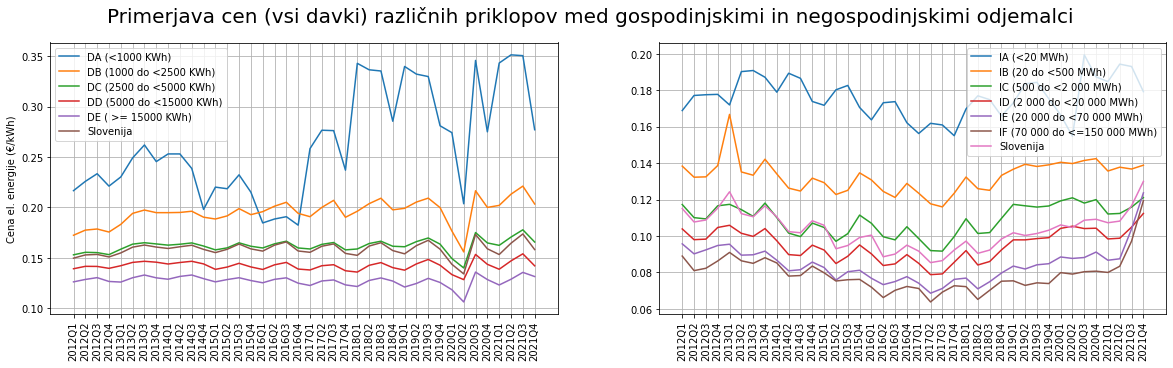

In [55]:
# Plot data.
plt.figure(figsize=(20, 5))
plt.suptitle("Primerjava cen (vsi davki) različnih priklopov med gospodinjskimi in negospodinjskimi odjemalci", fontsize=20)
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
for key, value in hits.items():
    plt.plot(quarters, value, label=key)
plt.legend()

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.grid()
for key, value in nhits.items():
    plt.plot(quarters, value, label=key)
plt.legend()
plt.show()

Iz podatkov lahko vidimo, da imajo odjemalci z manjšimi priklopi višje cene el. energije kot odjemalci z višjimi priklopi. Prav tako vidimo, da imajo negospodinjski odjemalci več standardnih porabniških skupin (in seveda tudi večje priklopne moči) kot gospodinjski odjemalci.

#### 1.2 Primerjava gospodinjskih odjemalcev

Pri tem podvprašanju smo primerjali cene gospodinjskih odjemalcev in različnih standardnih porabniških skupin.

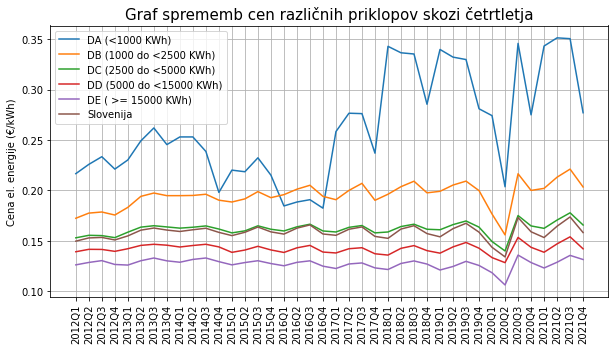

In [56]:
household_prices = de.read('../data/Cene el. energije za gospodinjske odjemalce.csv')
hp = dict()

hp = mu.init_dict_based_on_column(household_prices, 'STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)')

# Fill dicts with prices for each user group and quarter, thus symulating a matrix.
# Prices include all taxes.
for column in household_prices.columns[2:]:
    for key, value in hp.items():
        hp[key][column] = household_prices[column][household_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == key][household_prices['CENA'] == 'Z vsemi davki'].tolist()[0]
        
# Flatten the internal dicts for use in plotting.
hits = dict()
for key, value in hp.items():
    hits[key] = list(value.values())
    
quarters = [x for x in [y for y in hp.values()][0].keys()]

# Plot data.
plt.figure(figsize=(10, 5))
plt.title("Graf sprememb cen različnih priklopov skozi četrtletja", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
for key, value in hits.items():
    plt.plot(quarters, value, label=key)
plt.legend()
print()

Ker smo opazili zelo velik porast cen pri gospodinjskih odjemalcih (Standardna porabniška skupina DA), v letih 2017 in 2018, nas je zato zanimal bolj natančen pregled vseh faktorjev, ki so vplivali na končno ceno. Prav tako lahko smo opazili velik padec v cenah vseh porabniških skupin v drugem četrtletju leta 2020.

Ko smo iskali vzroke za padec v cenah v drugem četrtletju leta 2020, smo ugotovili, da se je [aprila tistega leta poraba el. energije zmanjšala za 19% v primerjavi z marcem](https://www.stat.si/statweb/News/Index/8852) in 15% v primerjavi z aprilom, leta 2019. Manjši proizvodnji el. energije pa je sledila tudi manjša proraba goriv. Skupna poraba goriv aprila 2020 je bila za 19% manjša kot aprila 2019. Zmanjšala se je tudi oskrba z motornim(za 43%) in dizelskim gorivom(za 65%), kar je bilo večinoma posledica COVID-19.

##### 1.2.1 Analiza porasta cen standarnde porabniške skupine DA leta 2017/2018

In [62]:
quarters_to_analyze = ['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4']

# Base group = DE ( >= 15000 kWh)

hp_specific = dict()

# Get only needed quarters.
for key, value in hp.items():
    hp_specific[key] = {k: v for k, v in value.items() if k in quarters_to_analyze}
    
differences = dict()
for q in quarters_to_analyze:
    differences[q] = {'Actual diff' : hp_specific['DA (<1000 KWh)'][q] - hp_specific['DE ( >= 15000 KWh)'][q], 
                      'Percent diff' : mu.get_percentage_diff(hp_specific['DA (<1000 KWh)'][q], hp_specific['DE ( >= 15000 KWh)'][q])}
    
print('         Actual difference | Percent difference')
for quarter, difference in differences.items():
    print(quarter + ":", difference['Actual diff'], difference['Percent diff'])
    
pmean = np.mean([v['Percent diff'] for k, v in differences.items() if k != '2016Q4'])
print()
print('Mean percent diff of years 2017 and 2018 compared to 2016Q4:', pmean - differences['2016Q4']['Percent diff'])
print('Mean percent diff of years 2017 and 2018:', pmean)

         Actual difference | Percent difference
2016Q4: 0.05750000000000001 46.03682946357087
2017Q1: 0.1357 110.68515497553018
2017Q2: 0.14940000000000003 117.54523996852875
2017Q3: 0.14800000000000002 115.53473848555818
2017Q4: 0.1137 92.28896103896103
2018Q1: 0.2212 181.9078947368421
2018Q2: 0.20879999999999999 163.63636363636365
2018Q3: 0.2051 157.64796310530363
2018Q4: 0.15839999999999999 124.72440944881889

Mean percent diff of years 2017 and 2018 compared to 2016Q4: 86.95951121091743
Mean percent diff of years 2017 and 2018: 132.9963406744883


Opazimo lahko, da je cena el. energije standardne porabniške skupine DA v primerjavi z standardno porabniško skupino DE iz leta 2016 na leti 2017/2018 narasla za približno 87%. Že v zadnjem četrtletju 2016 sta se ceni razlikovali za 46% (0.0575€), nato pa je njuna razlika narasla na povprečno 133%.

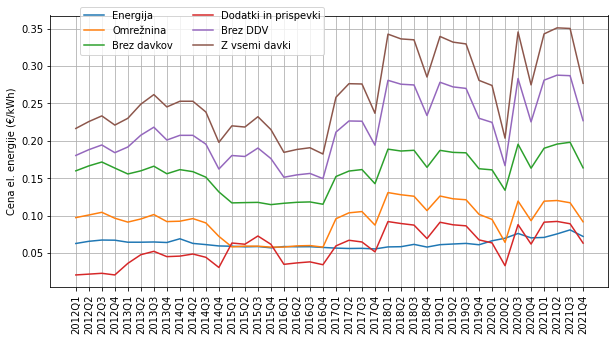

In [63]:
hp = dict()

hp = mu.init_dict_based_on_column(household_prices, 'CENA')

for column in household_prices.columns[2:]:
    for key, value in hp.items():
        hp[key][column] = household_prices[column][household_prices['CENA'] == key][household_prices['STANDARDNA PORABNIŠKA SKUPINA (LETNA PORABA)'] == 'DA (<1000 KWh)'].tolist()[0]
        
hits = dict()
for key, value in hp.items():
    hits[key] = list(value.values())
    
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel("Cena el. energije (€/kWh)")
plt.grid()
for key, value in hits.items():
    plt.plot(quarters, value, label=key)
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 1.05), ncol=2)
print()

Opazimo lahko visoko porast cene brez DDV in cene z vsemi davki porabniške skupine DA. Preverili smo možne dejavnike, ki bi lahko vplivali na višje cene, in ugotovili, da je se je v letu 2018 zgodil porast cen energetskih surovin, zgodil se je [upad domače proizvodnje, kar je dvignilo ceno zemeljskega plina](https://www.gzs.si/Portals/SN-informacije-Pomoc/Vsebine/GG/december-2018/65.pdf), prav tako pa se je v Angliji zaprlo največje skladišče zemeljskega plina. Bolj podrobno analizo energentov bomo izvedli v naslednjih vprašanjih.

#### 1.3 Primerjava negospodinjskih odjemalcev

#### 1.4 Analiza davkov gospodinjskih in negospodinjskih odjemalcev